<a href="https://colab.research.google.com/github/ady909/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for Online Retail store. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Datasets/Online Retail.xlsx")


In [ ]:
# copying data
raw_data = data.copy()

# **Data Exploration**

In [ ]:
# first look of data
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
raw_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# shape
raw_data.shape

(541909, 8)

In [ ]:
# basic info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The data contains information about transnational transactions for a UK-based and registered non-store online retail. THe dataset has 541909 rows(transactions) and 8 columns(attributes).

**Data** **Attributes**

**1. InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

**2. StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**3. Description**: Product (item) name. Nominal.

**4. Quantity**: The quantities of each product (item) per transaction. Numeric.

**5. InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**6. UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**7. CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**8. Country**: Country name. Nominal, the name of the country where each customer resides.

## **Data Inspection**

In [ ]:
# checking duplicate values
raw_data.duplicated().sum()

5268

In [ ]:
raw_data[raw_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# droping duplicate values
raw_data = raw_data.drop_duplicates()

In [ ]:
raw_data.duplicated().sum()

### **Checking missing values**

In [ ]:
# checking mising values
raw_data.isnull().sum()

In [ ]:
raw_data.isnull().sum().plot.bar()
plt.ylabel('missing count');

In [ ]:
# looking at the missing values
raw_data[raw_data['CustomerID'].isna()]

In [ ]:
# checking null values %
raw_data['CustomerID'].isnull().sum()*100/len(raw_data)

**Imputing missing CustomerID is not possible and our main task is of customer segmentation so we will drop missing CustomerID values which are around 25%.**

In [ ]:
# droping missing values
raw_data = raw_data.dropna(subset=['CustomerID'],axis=0)
raw_data.isna().sum()

In [ ]:
raw_data.shape

In [ ]:
# descriptive statistics
raw_data.describe()

# **Exploratory Data Analysis**

### **Exploring columns**

### **Exploring Quantity**

In [ ]:
# descriptive statistics plot
describe_qnty = raw_data["Quantity"].describe().reset_index()
describe_qnty = describe_qnty[describe_qnty['index'] != 'count']
sns.catplot(x='index', y='Quantity', data=describe_qnty, kind='point')
plt.title('Descriptive Statistics for Quantity')
plt.xlabel('Statistic')
plt.ylabel('Quantity')
plt.show()

**We can see minimum value for quantity is negative**

In [ ]:
# boxplot
plt.boxplot(raw_data['Quantity']);

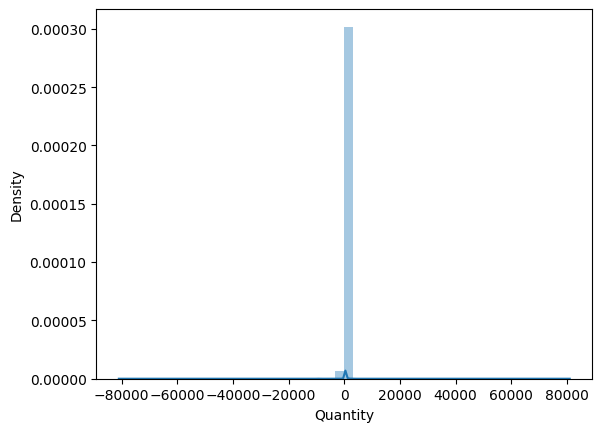

In [ ]:
# distribution plot
sns.distplot(raw_data['Quantity']);

In [ ]:
# checking minimum value
raw_data[raw_data['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


This type of transactions are of cancelled orders and we saw in description this transactions have C at starting of InvoiceNo. We will see more out of it

In [ ]:
# InvoiceNo starting with C
raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
cancelled_df= raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**We can see Quantity is less than 0 for all InvoiceNo starting with C as we expected this are the cancelled orders**

In [ ]:
cancelled_df.shape

(8872, 8)

**There are 8872 cancelled orders in our dataset which are huge**

### **Exploring UnitPrice**

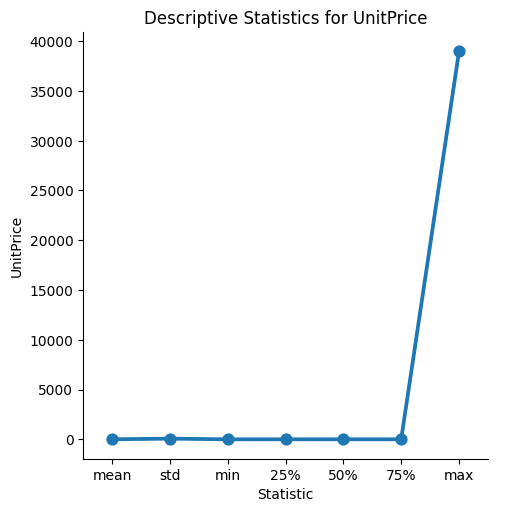

In [ ]:
# descriptive statistics plot
describe_unitprice = raw_data["UnitPrice"].describe().reset_index()
describe_unitprice = describe_unitprice[describe_unitprice['index'] != 'count']

# Use 'catplot' (formerly 'factorplot') with kind='bar' for this kind of visualization
sns.catplot(x='index', y='UnitPrice', data=describe_unitprice, kind='point')
plt.title('Descriptive Statistics for UnitPrice')
plt.xlabel('Statistic')
plt.ylabel('UnitPrice')
plt.show()

In [ ]:
len(raw_data[raw_data['UnitPrice']==0.0])

40

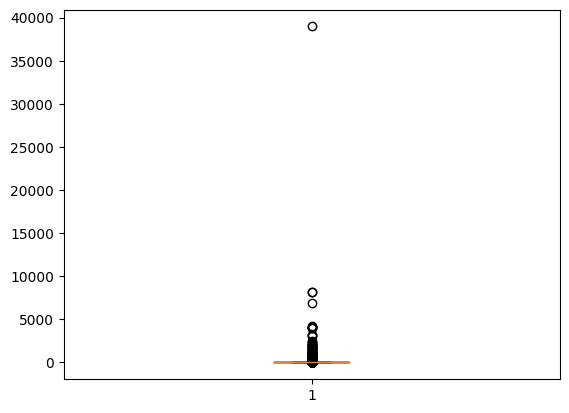

In [ ]:
# boxplot
plt.boxplot(raw_data['UnitPrice']);

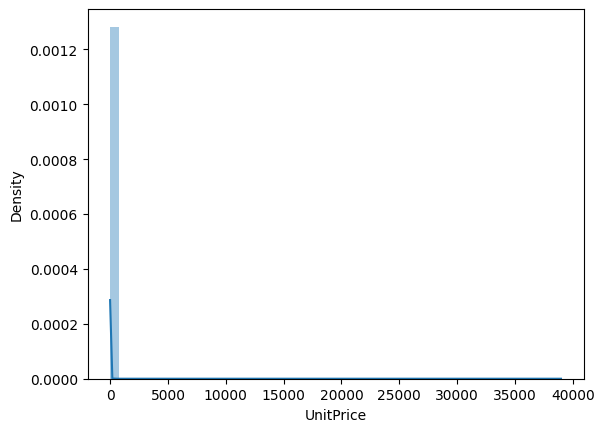

In [ ]:
# distribution
sns.distplot(raw_data['UnitPrice']);

In [ ]:
# transaction with max price
raw_data[raw_data['UnitPrice']==raw_data['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


**The order with max unitprice is a cancelled order**

### **Exploring CustomerID and InvoiceNo**

In [ ]:
# number of customers in total
len(raw_data['CustomerID'].value_counts())

4372

In [38]:
# number of transactions
len(raw_data['InvoiceNo'].value_counts())

22190

**4372 customer records are present in the dataset having 22190 orders in total.**

In [39]:
cmr_df= raw_data['CustomerID'].value_counts()

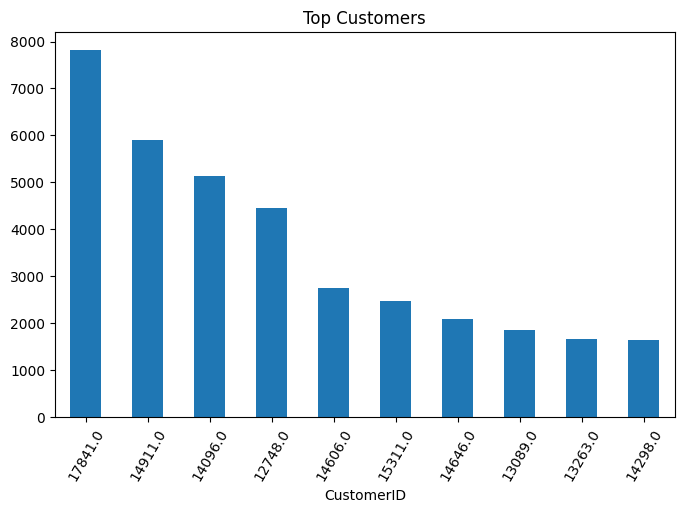

In [40]:
# top customers
plt.figure(figsize=(8,5))
cmr_df.head(10).plot.bar()
plt.title('Top Customers')
plt.xticks(rotation=60);

In [41]:
# top customer
raw_data[raw_data['CustomerID']==17841.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom
1442,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841.0,United Kingdom
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841.0,United Kingdom
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
537748,581334,22077,6 RIBBONS RUSTIC CHARM,1,2011-12-08 12:07:00,1.95,17841.0,United Kingdom
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841.0,United Kingdom
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841.0,United Kingdom
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841.0,United Kingdom


### **Examining StockCode and their Description**

In [42]:
# total number of products
raw_data['StockCode'].nunique()

3684

**There are 3684 products in the dataset.**

In [43]:
# number of unique item descriptions
raw_data['Description'].nunique()

3896

**The number of products and the number of descriptions do not match. We can say that some of the products might have more than one descriptions.**

In [44]:
# stockcodes having more than one descriptions
stock_df= raw_data.groupby(["StockCode","Description"]).count().reset_index()['StockCode'].value_counts()
stock_df.head()

StockCode
23236    4
23196    4
23366    3
23203    3
22937    3
Name: count, dtype: int64

**These are the top StockCodes with more than one description. Since our objective is Customer Segmentation this will not any impact on our analysis so we will neglect this.**

### **Exploring Country column**

In [46]:
# number of countrys
country_cnt = raw_data['Country'].value_counts()
len(country_cnt)

37

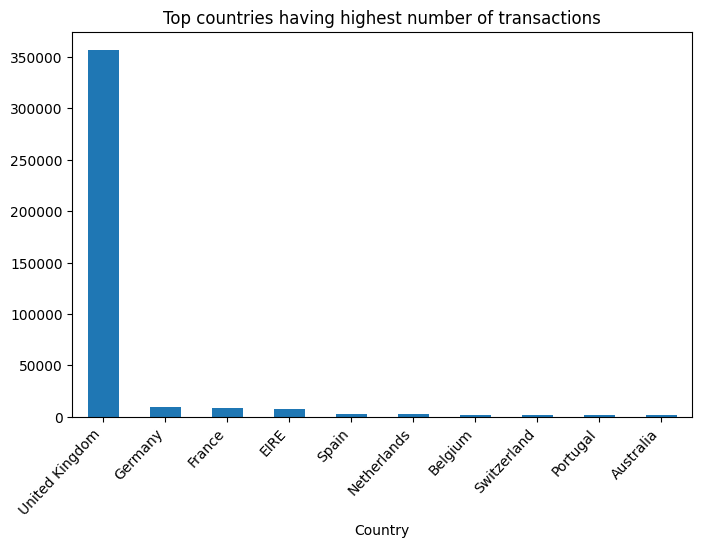

In [47]:
# top countries having highest number of transactions
plt.figure(figsize=(8,5))
country_cnt.head(10).plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()

**The above graph shows the number of transactions from the top 10 countries. This shows that around 90% of orders are coming from United Kingdom.**

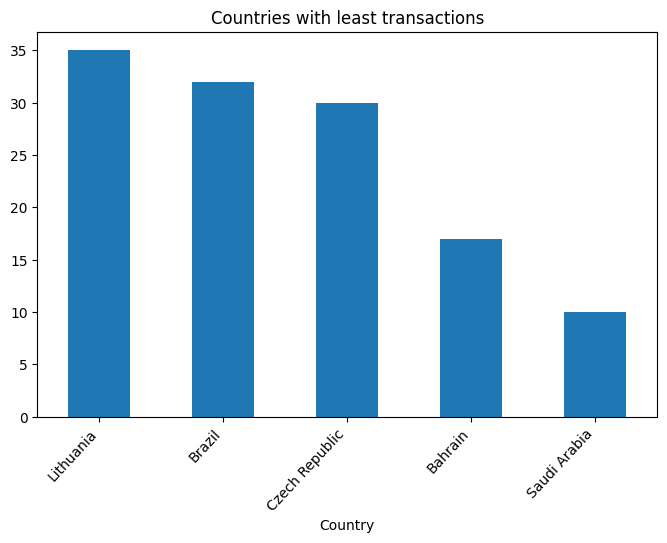

In [48]:
# countries with least transactions
plt.figure(figsize=(8,5))
country_cnt.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

Countries with least transactions:
1. Lithuania
2. Brazil
3. Czech Republic
4. Bahrain
5. Saudi Arabia

In [49]:
# checking transaction % in UK
tr_uk = round(len(raw_data[raw_data['Country']=='United Kingdom']) / len(raw_data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.83% transactions are from United Kingdom.


## **Data Insights**

### **What is the average quantity customers purchase per order?**

In [55]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [56]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [57]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
qtywise_ctr= raw_data.groupby(['CustomerID','InvoiceDate'])['Quantity'].sum().reset_index()
qtywise_ctr.sort_values(by='Quantity', ascending=False).head()

,CustomerID,InvoiceDate,Quantity
15458,16446.0,2011-12-09 09:15:00,80995
0,12346.0,2011-01-18 10:01:00,74215
198,12415.0,2011-06-15 13:37:00,15241
8992,14646.0,2011-08-11 16:12:00,14730
9009,14646.0,2011-10-20 12:03:00,13392


**These are the top customers who purchased maximum quantity per order.**

In [60]:
qtywise_ctr['Quantity'].describe()

count    22034.000000
mean       222.059136
std       1173.882550
min     -80995.000000
25%         31.000000
50%        120.000000
75%        254.000000
max      80995.000000
Name: Quantity, dtype: float64

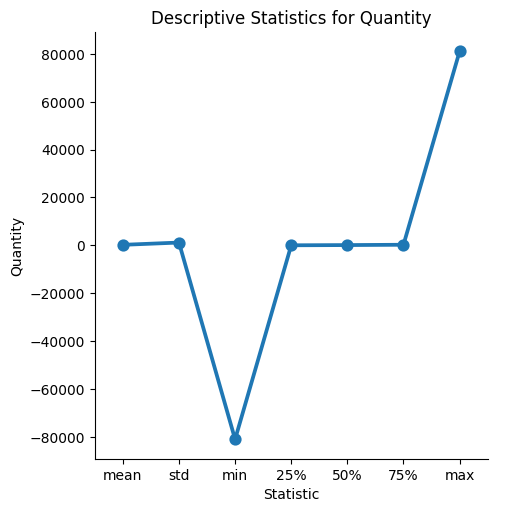

In [63]:
describe_qnty_df = qtywise_ctr["Quantity"].describe().reset_index()

# Remove the 'count' row
describe_qnty_df = describe_qnty_df[describe_qnty_df['index'] != 'count']

# Use 'catplot' with kind='bar' for categorical visualization
sns.catplot(x='index', y='Quantity', data=describe_qnty_df, kind='point')
plt.title('Descriptive Statistics for Quantity')
plt.xlabel('Statistic')
plt.ylabel('Quantity')
plt.show()

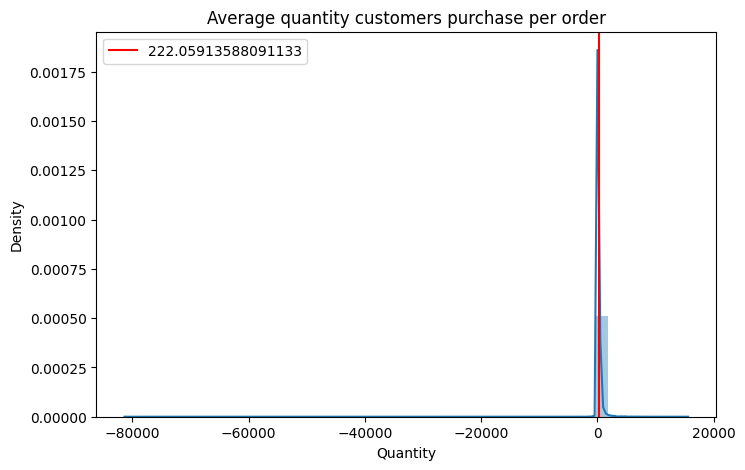

In [64]:
# Average quantity customers purchase per order
data3= qtywise_ctr[qtywise_ctr['Quantity']<25930.0]
plt.figure(figsize=(8,5))
sns.distplot(data3['Quantity'])
plt.xlabel("Quantity")
xmean=qtywise_ctr['Quantity'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average quantity customers purchase per order");

**The average quantity purchased by the customers per order is around 250.**

### **Top customers buying maximum quantity**

In [69]:
filtered_avg_qnty = avg_qnty[(avg_qnty[avg_qnty.columns[1]]>=5) & (avg_qnty['qnty/order']>0)]
filtered_avg_qnty.head()

,CustomerID,qnty/order
1,12347.0,351.142857
2,12348.0,585.250000
3,12349.0,631.000000
4,12350.0,197.000000
5,12352.0,42.727273


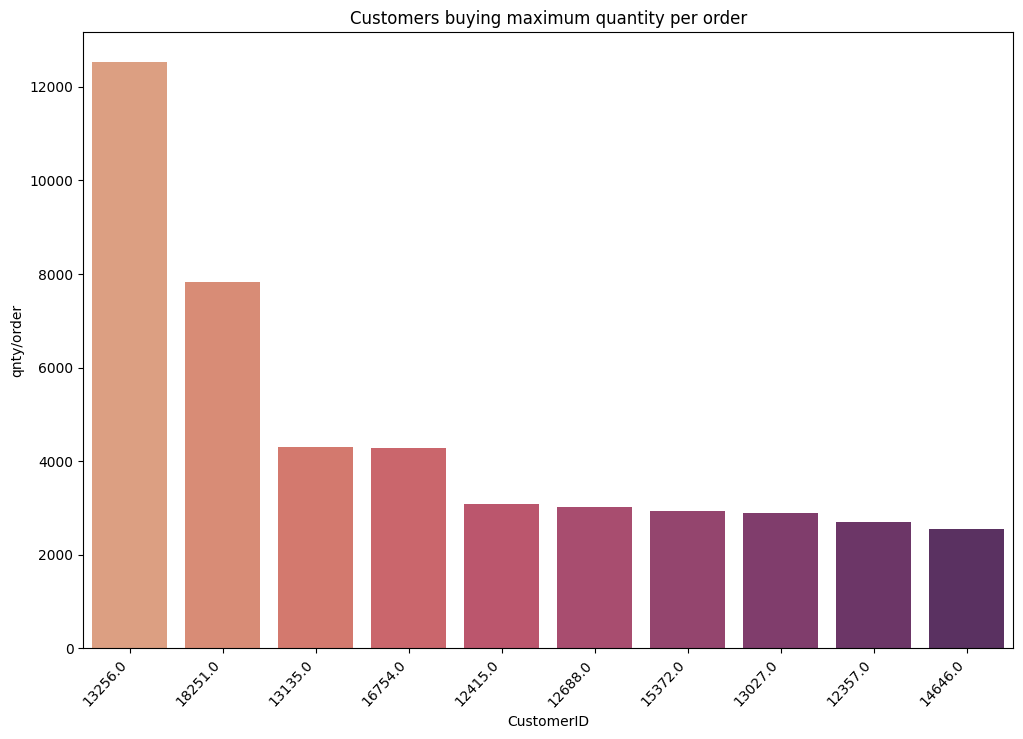

In [70]:
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='qnty/order',ascending=False).head(10)

# plot
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='qnty/order', data= data1, order=data1['CustomerID'], palette='flare')
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers buying maximum average quantity per order. These could be the wholesalers who buy in bulk.**

### **Top customers with highest number of orders**

In [74]:
filtered_avg_qnty.head()

,CustomerID,qnty/order
1,12347.0,351.142857
2,12348.0,585.250000
3,12349.0,631.000000
4,12350.0,197.000000
5,12352.0,42.727273


In [75]:
'orders' in filtered_avg_qnty.columns

False

In [78]:
for column in filtered_avg_qnty.columns:
    if column.lower().startswith('orders'):
        correct_column_name = column
        break

In [80]:
correct_column_name = filtered_avg_qnty.columns[1]

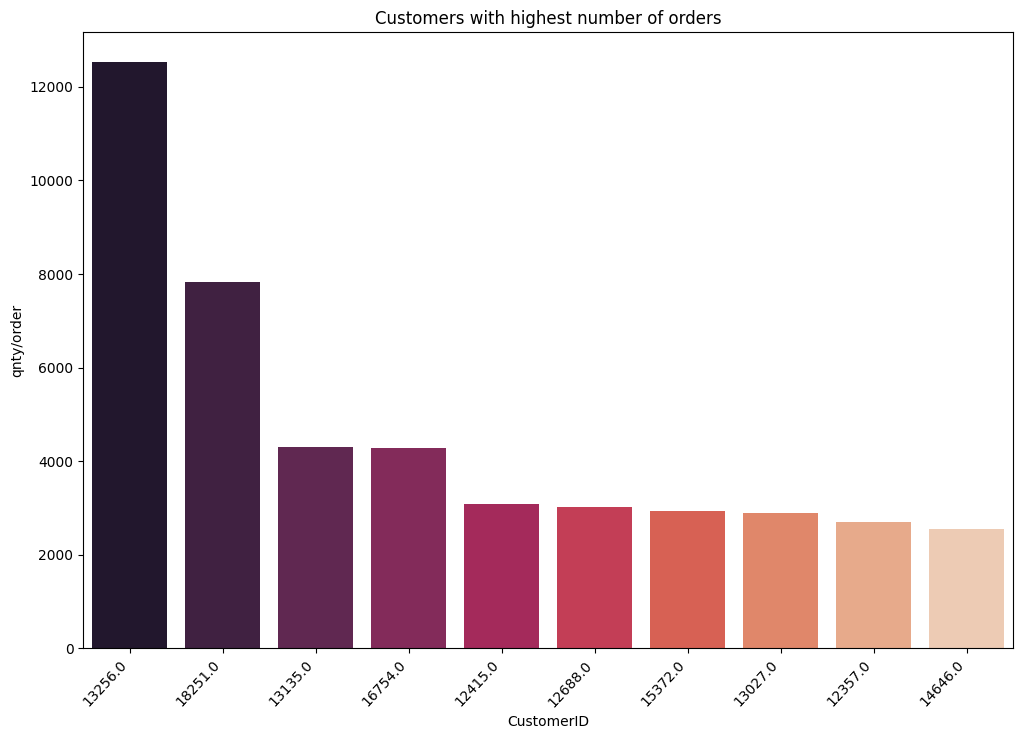

In [81]:
data2 = filtered_avg_qnty.sort_values(by=correct_column_name, ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='CustomerID', y=correct_column_name, data=data2, order=data2['CustomerID'], palette='rocket')
ax.set_title('Customers with highest number of orders')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers who have maximum orders**

### **Which Country has most customers?**

In [82]:
cmr_cty_df= raw_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
cmr_cty_df= cmr_cty_df.reset_index().rename(columns={'CustomerID':'Number_of_Customers'})
cmr_cty_df.head()

,Country,Number_of_Customers
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25


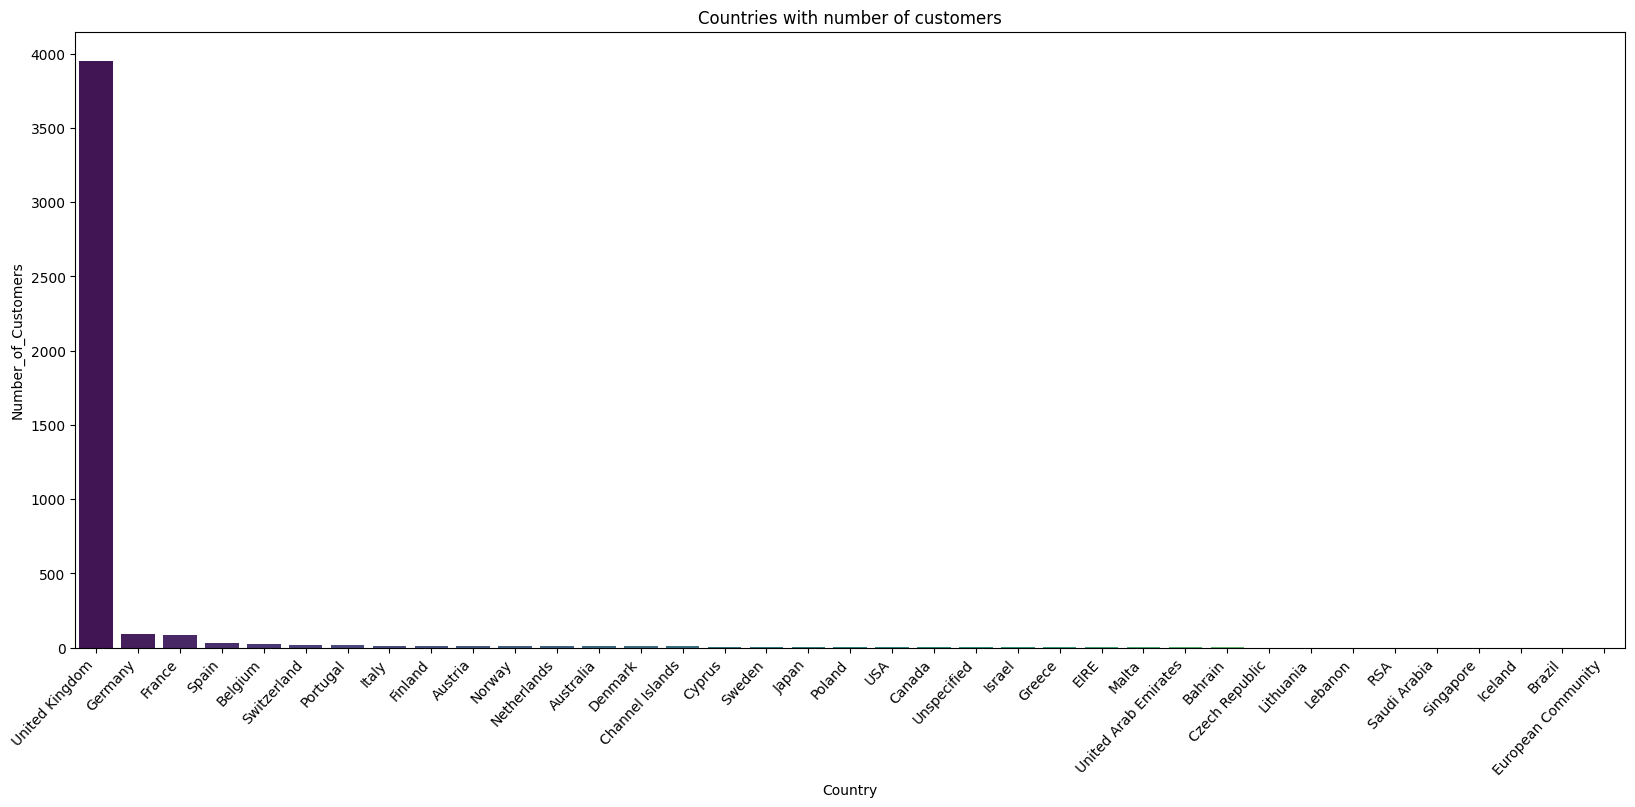

In [83]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.barplot(x='Country', y='Number_of_Customers',data=cmr_cty_df,ax=ax, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
ax.set_title('Countries with number of customers')
plt.show()

**Not only maximum transactions come from the UK but also most customers are located in the United Kingdom.**